# Meeting One (ideally would have gone like this)

## Our Goals and Aspirations With This Project

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

#### Tasks to perform

- The purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

- Masked in the column description means already converted from categorical value to numerical column.


### Roadmap

Every ML project begins with the following pipeline in mind:
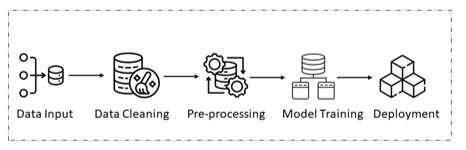
It is not a requisite for us to think about these steps actively as we try to build our project but following them in an orderly manner just saves us from a world of pain when we try to really work with our data and have it speak to us.You'll understand better when we start cleaning our data, visualizing it, observing trends, and weeding out the features that do not help us with our predictions.<br><br>
Let's get into the building.

Here is the life blood of our code - libraries:

In [75]:
import pandas as pd  # Data frame: https://pandas.pydata.org/docs/getting_started/index.html#getting-started 
import numpy as np  # Arrays and matrices that make calculations easier: https://numpy.org/
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/users/getting_started/index.html
from sklearn.impute import SimpleImputer  # Replace missing values using a descriptive statistic: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.preprocessing import LabelEncoder  # Encode target labels with value between 0 and n_classes-1.
from sklearn.linear_model import LinearRegression  #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.model_selection import KFold  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.metrics import mean_squared_error, r2_score  # https://scikit-learn.org/stable/api/sklearn.metrics.html
from sklearn import model_selection  # https://scikit-learn.org/stable/api/sklearn.model_selection.html
from sklearn.linear_model import Ridge  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Lasso  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.neighbors import KNeighborsRegressor  # https://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.tree import DecisionTreeRegressor  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.ensemble import RandomForestRegressor  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
import types  # https://docs.python.org/3/library/types.html

## Data Input: Gathering Raw Data


<br>Most ML projects start with one big data set that you need to later split into subsections according to your training and testing needs, but us blessed folk have our data split into training and testing data by the datset gods, so lets go ahead and import that:

In [2]:
dataset_train = pd.read_csv(r'./Data/train.csv')
dataset_test = pd.read_csv(r'./Data/test.csv')

A little sneak peak:

In [114]:
print(len(dataset_train))  # Number of rows in training data.
print(len(dataset_test))  # Number of rows in testing data.
dataset_train.head()  # Top 5 rows of our training data.

550068
233599


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,999.0,999.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,999.0,999.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,999.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,999.0,999.0,7969


You see all those weird values in the "Product_Category_2" and "Product_Category_3" columns? The ones that look look like "NaN"?<br> Yeah, those are really pesky values that stand for "Not a Number" and can mess up our model when it tries to do its elegant, super smart calculations. These NaN values are simulations of inconsistencies in real-life data that we need to clean before we move any further in our journey.

## Data Cleaning
We're gonna make a bunch of functions that clean out those NaN values, standarize our categorical data point and sets some rules that our datset will follow.<br>This might seem like tedious work before you get to the meat of the project but the it is going to be a lifesaver later. Trust.

Let's find the unique values in our data and create a dictionary to store them:

In [4]:
columns = dataset_train.columns  # Extracting column names from our training df.
dic_columnwise_acceped_value = {}   # Creating a dictionary.
for i in columns[2:-1] :  # [2:-1] excludes the first two and the last columns from the loop.
    temp1 = dataset_train[i].unique()  # Extract unique values from the current column in the training df.
    temp2 = dataset_test[i].unique()  # Extract unique values form the current column in the testing df.
    try :  # Handles potential TypeError exceptions that might occur if the column contains non-numeric values (coughNaNcough).
        if np.isnan(temp1).any() and np.isnan(temp2).any() :  # If any of the unique values is temp1 and temp2 are NaN,
            temp1 = temp1[~np.isnan(temp1)]  # get rid of them.
    except TypeError :
        pass
    tem_dup =  np.hstack([temp1, temp2])  # Concatenates the cleaned unique values.
    tem_dup = np.unique(tem_dup)  # Since we combined two different arrays we'll get the unique values from this concatenation.
    dic_columnwise_acceped_value[i] = list(tem_dup)  # Using the column names as keys, store the entire list of unique values.
    print(i,tem_dup)  # Printing the current column and all its unique values.

Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category ['A' 'B' 'C']
Stay_In_Current_City_Years ['0' '1' '2' '3' '4+']
Marital_Status [0 1]
Product_Category_1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category_2 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Product_Category_3 [ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]


Now lets count the null/NaN values in our columns:

In [5]:
print(dataset_train.isna().sum())  # Calculates the sum of null/NaN in training data.
print(dataset_test.isna().sum())  # Calculates the sum of null/NaN in testing data.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


#### Function 1: replace_NaN 
Replacing all those null/NaN values with 999 so that they can be encoded later:

In [137]:
def replace_NaN(data, columns, *args) :  # Parameters, df containing the data, column names, list of     
    # Identify NaN values and assign them with a constant valu of 999.
    mp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=999)
    # Now lets fit our designed imputer to trasnformed_val.
    # transform_val contains a set of numpy arrays of the chosen columns from our data.
    transformed_val = mp.fit_transform(data.iloc[:,[columns.get_loc(i) for i in list(args)]].values)
    df = data.copy()  # Creating a copy of the data.
    df[list(args)] = transformed_val  # Assigns the transformed data to the copy to return.
    return df

Use this function on Product Category 2 and 3 and see the changes.

In [138]:
# Making those modifications on training and testing data.
dataset_train = replace_NaN(dataset_train, dataset_train.columns, 'Product_Category_2', 'Product_Category_3')
dataset_test = replace_NaN(dataset_test, dataset_test.columns, 'Product_Category_2', 'Product_Category_3')

dataset_train.head()

('Product_Category_2', 'Product_Category_3')
('Product_Category_2', 'Product_Category_3')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,999.0,999.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,999.0,999.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,999.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,999.0,999.0,7969


# Meeting Two

#### Function 2: replace_column_with_Dummy_Columns
A bunch of our columns have categorical data (City_Category, for example) that we want to convert to a form that is more computable in our functions. To do this, we will create dummy variables to store these values...<br><br>
BUT, there is a problem that can arise through thise process. It is called the dummy variable trap.<br>
The dummy variable trap occurs when you include all possible categories of categorical variables as dummies in a regression model.This leads to perfect multicollinearity, as one dummy variable can be perfectly predicted by the others. This causes problems during model estimation and prediction.<br>
We're gonna deal with this by creating (n - 1) number of dummy variables for every categorical column containing n different categories containing either 0 or 1.

In [8]:
def replace_column_with_Dummy_Columns(data, columns, column_name, remove_column_val, remove_one_dummy=False, dtype=int) :
    # data: df
    # columns: List of categorical columns
    # column_name: Name of current column
    # remove_column_val: Column name with the highest number of unique values.
    # remove_one_dummy: Whether to remove a dummy variable or not.
    
    # Creates dummy variables for the given 'column_name'.    
    temp = pd.get_dummies(data[column_name], prefix=column_name, dtype=dtype)
    col = list(temp.columns)
    # removed_col will contain the dummy variable extracted from the original column.
    removed_col = column_name+'_'+remove_column_val
    removed_col_index = col.index(removed_col)  # Index of dummy variable to be removed.
    # If remove_one_dummy=True, then we remove one dummy variable to avoid the dummy variable trap of perfect multicollinearity.
    temp = temp[col[:removed_col_index] + col[removed_col_index+(1 if remove_one_dummy else 0):]] 
    previous = data[columns[:columns.index(column_name)]]  # Contains the columns before our current categorical column.
    after = data[columns[columns.index(column_name)+1:]]   # Contains the columns after our current categorical column.
    previous = previous.join(temp)  # Joins the columns before with the dummy variables that we created.
    previous = previous.join(after)  # Joins the columns after with the result.
    # Returning a df with our currrent categorical column split into dummy variables.
    return previous

#### Function 3: get_dummy_dataset
This function complements Function 2 and passes it all its parameters.

In [9]:
def get_dummy_dataset(data, columns, cat_col_list) :
    # data: df
    # List of all columns in data
    # cat_col_list: List of all categorical columsn in data.
    
    col = cat_col_list
    # Creating a df using a lambda function that passes only the columns with non-categorical data.
    df = data[list(filter(lambda x: x not in cat_col_list, columns))]
    for i in cat_col_list :  # Looping over list of categorical column names
        # Creating a dictionary. Keys = categorical column names. Values: Number of unique values in those columns.
        dic = data[i].value_counts().to_dict()
        max_key = max(dic, key=dic.get) # Grabbing the categorical column names with the highest number of unique values.
        # Calling Function 2 here to replace the current categorical column with dummy variables.
        data = replace_column_with_Dummy_Columns(data, col, i, str(max_key), True)
        col = list(data.columns)  # Now updating the names of the columns we have after extracting dummy variables.
    df= df.join(data)  # Joining non-categorical columns with categorical columns.
    return df  # Returning data set that has been completely split into dummy variables where needed.

#### Function 4: get_encoded_dataset
Calls the get_dummy_dataset function
#### Function 5: get_label_encoded_data
Encode categorical features in a DataFrame into numerical values. This is a common preprocessing step in machine learning, as most algorithms expect numerical input.

In [10]:
def get_encoded_dataset(dataset, category_column) :
    columns = list(dataset.columns)  # List of all columns.
    df = get_dummy_dataset(dataset, columns, category_column)
    return df
def get_label_encoded_data(df, label_col) :
    for i in label_col :  # Looping over column names that need their values label encoded.
        le = LabelEncoder()  # LabelEncoder object.
        # Calling fit_transform on the current column, replacing categorical values with numerical ones.
        df[i] = le.fit_transform(df[i])  # I really recommend looking at the documentation for this.
    return df

#### Function 6: get_train_test_data
This function is designed to split a dataset into training and testing sets, handling both DataFrames and NumPy arrays

In [11]:
def get_train_test_data(df, slice_index, data_label) :
    # slize_index: Index of the column in the data frame we want to slice till.
    # data_label: df of just one column from df.
    if type(data_label) is not pd.DataFrame :  # If it's not a data frame.
        assert False
    if type(df) is pd.DataFrame :  # If it is a data frame.
        sliced_train_data = df.iloc[:slice_index,:]  # Selects rows from the beginning to the slice_index.
        sliced_test_data = df.iloc[slice_index:, :]  # Selects rows from the slice_index to the end.
        # Concatenates the training data with the label column, adding the label as a new column.
        sliced_train_data = pd.concat([sliced_train_data, data_label], axis = 1)
    else :  # Similar steps for a numpy array.
        data_label = data_label.iloc[:, :].values
        sliced_train_data = df[:slice_index]
        sliced_test_data = df[slice_index:]
        sliced_train_data = np.concatenate((sliced_train_data, data_label), axis = 1)
    return sliced_train_data, sliced_test_data

#### Function 7: get_encoded_data
Okay, it's all starting to come together now.<br><br>
This function is designed to prepare a dataset for machine learning, i.e., all the models we are going to implement on our data.

In [12]:
def get_encoded_data(dataset_train, dataset_test, model_type='non_tree_based') :
    column = list(dataset_train.columns)  # List of all columns in the training set.
    df = dataset_train[column[:-1]] # df contains all the columns from the training set except the last one - our target variable.
    df = pd.concat([df, dataset_test], ignore_index=True) # Merging the training and testing datasets together.
    category_column = ['Gender', 'Occupation', 'City_Category',
                       'Product_Category_1', 'Product_Category_2',
                       'Product_Category_3']  # Our categorical columns.
    label_col = ['Age', 'Stay_In_Current_City_Years']  # Our columns that need label encoding.
    if model_type == 'non_tree_based' :  # Not a tree based model? Do the following data cleaning.
        df = get_label_encoded_data(df, label_col)  # Label encode these categorical features.
        df = get_encoded_dataset(df, category_column)  # Create dummy variables for these categorical features.
    elif model_type == 'tree_based' :  # Special treatment for tree based models.
        # We will label encode ALL categorical features for tree based.
        df = get_label_encoded_data(df, label_col+category_column)
    else :
        pass
    return df

# Meeting Three

#### Function 8:
Calling function 7 depending on model type.

In [13]:
def get_data_model_based(dataset_train, dataset_test, model_type='non_tree_based') :
    data_label = dataset_train[['Purchase']]  # Extracting target variable.
    slice_index = len(dataset_train) 
    if model_type == 'non_tree_based' :
        df = get_encoded_data(dataset_train, dataset_test, model_type)  # Encode our data.
        df = df.drop(['User_ID', 'Product_ID'], axis = 1)  # Removing columns irrelevant to predicting purchases.
        data_train, data_test = get_train_test_data(df, slice_index, data_label)  # Creating testing and training sets.
    elif  model_type == 'tree_based' :
        df = get_encoded_data(dataset_train, dataset_test, model_type)
        df = df.drop(['User_ID', 'Product_ID'], axis = 1)
        df = df.applymap(str)  # Converting all values in the dataframe to strings.
        data_train, data_test = get_train_test_data(df, slice_index, data_label)
    else  :
        return None, None
    return data_train, data_test

For non tree based Data

In [14]:
data_train, data_test = get_data_model_based(dataset_train, dataset_test, model_type='non_tree_based')

For tree based Data

In [146]:
datatb_train, datatb_test = get_data_model_based(dataset_train, dataset_test, model_type='tree_based')
datatb_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,2,17,15,8370
1,0,0,10,0,2,0,0,4,10,15200
2,0,0,10,0,2,0,11,17,15,1422
3,0,0,10,0,2,0,11,12,15,1057
4,1,6,16,2,4,0,7,17,15,7969


#### Function 9:
Create a function which return train, test split

In [18]:
def get_test_train_data(data) :
    X = data[:, :-1]
    y = data[:, -1]
    X_train, X_test, y_train , y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)
    return (X_train, X_test, y_train , y_test)

Okay, phew. We are done here. We have completed creating all the functions we need to make sure our dataset looks and acts the way we want it to so that we can go ahead and make our models and get to the juicy part of our project.

BUT before that (I know and I'm sorry)!!!<br>

We are going to create a generic class for our models. This class will store a bunch of information for our models, like their names, cross validation scores, etc. This will make for easy access of our models as objects.

In [16]:
class ModelObject :
    def __init__(self, name) :
        self._name = name
        self._cross_validation_score = None
        self._model = None
    @property
    def name(self) :
        return self._name
    @property
    def cross_validation_score(self) :
        return self._cross_validation_score
    @cross_validation_score.setter
    def cross_validation_score(self, value) :
        try :
            self._cross_validation_score = value
        except Exception as e:
            raise Exception('value object is not in format',e)
    @property
    def model(self) :
        return self._model
    @model.setter
    def model(self, value) :
        self._model = value
        self._cross_validation_score = None
    def __str__(self) :
        res = '\n'
        res += 'Model Name :- ' + self._name + '\n'
        return res

## Model Training

Models we are going to train:
- Linear Regression
- Ridge Regression
- Lasso Regression
- K-Nearest Neighbors Regression
- Decision Tree Regression
- Random Forest Regression

### Linear Regression

Linear regression models the relationships between at least one explanatory variable and an outcome variable. This flexible analysis allows you to separate the effects of complicated research questions, allowing you to isolate each variable’s role.

Linear regression has two primary purposes—understanding the relationships between variables and prediction:
- The coefficients represent the estimated magnitude and direction (positive/negative) of the relationship between each independent variable and the dependent variable.
- The equation allows you to predict the mean value of the dependent variable given the values of the independent variables that you specify.

Arguably the most important numbers in the output of the regression table are the regression coefficients. Yet, despite their importance, what the heck do they mean?

In a linear regression equation that looks like: $y = b_0 + b_1x_1 + b_2x_2$
- $b_0$ represents the intercept of the line of best fit. It is where the line meets the y-axis.
- $b_1$ and $b_2$ represent the factor that y changes by when $x_1$ or $x_2$ change respectively.

By adjusting these coefficients, we can fit the line to the data points and make predictions.<br><br>

In [28]:
def get_optimal_modellr(X_train, y_train) :
    seed_k_fold = 7  # Random seed
    no_of_split = 10  # Partitioning your data set into 10 bins of equal size
    # = (number of data points in data set/10) number of data points per bin
    scoring = 'neg_mean_squared_error'  # Scoring metric 
    lr = ModelObject('Linear Regression')  # Storing the model in our custom object.
    kfold = model_selection.KFold(n_splits= no_of_split, shuffle = True, random_state=seed_k_fold)  # K-Fold cross validator.
    # Linear regression model instance.
    lr.model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
    cv_results = -model_selection.cross_val_score(lr.model, X_train, y_train,cv=kfold, scoring=scoring)
    # Performs cross-validation, calculating the negative mean squared error for each fold.
    # The negative sign is used because the cross_val_score function maximizes the score, but we want to minimize it.
    cv_results.sort(axis=-1, kind='mergesort', order=None)  # Sorting cross validation scores in ascending order.
    lr.cross_validation_score = cv_results  # Storing the sorted results in our object.
    return lr

Another important concept in this piece of code is the mean squared error.<br>
Mean Squared Error (MSE) is a way to measure how accurate your model's predictions are. It does so using the following formula: 
$$MSE = \frac{1}{n} * \Sigma(y_i - ŷ^i)^2$$

Where:
- n: Number of data points
- $y_i$: Actual value of the ith data point
- $ŷ_i$: Predicted value of the ith data point

There is actually more important detail in why it is a squared error:
- Punishes Larger Errors: Squaring larger errors amplifies their impact on the overall MSE, making the model more sensitive to larger prediction mistakes.
- Eliminates Negative Values: Squaring ensures that all errors are positive, regardless of whether the prediction was over or under the actual value. No cancelling of errors of the opposite sign.

From this above explanation, it then becomes clear that a lower MSE indicates a better-performing model. It means that, on average, your model's predictions are closer to the actual values.

In [29]:
data = get_test_train_data(data_train.values)  # Getting training and testing data.
if data is not None :
    X_train, X_test, y_train , y_test = data[0], data[1], data[2], data[3]
    lr = get_optimal_modellr(X_train, y_train)  # Calling the model on our data.
    print('cr mean -',lr.cross_validation_score.mean())

cr mean - 8890392.295194753


### Ridge Regression
Ridge Regression is a linear regression technique that adds a penalty term to the cost function. This penalty term is proportional to the square of the magnitude of the model's coefficients. This modification helps to prevent overfitting, especially when dealing with multicollinearity.

When training this model we use a specialized optimization algorithm like gradient descent that basically minimizes the cost function by fine tuning the parameters of the following equation:<br>
$$Cost(w) = MSE(w) + \alpha * ||w||^2$$
Where:
- MSE: Mean squared error
- $\alpha$: Regularization parameter that is up to us to set. This controls the strength of the penalty.
- $||w||^2$: Sum of squared coefficients.

Linear regression doesn't take all these measures to prevent overfitting and regularization of its parameters, which makes ridge regression a great alternative to simply complex models by reducing the impact of less important features.

In [39]:
def get_ridge_regression_model(lambda_val) :
    # This function creates a Ridge model with the specified parameters.
    return Ridge(alpha = lambda_val, fit_intercept=True, copy_X=True,
                         max_iter=None, tol=0.001, solver='auto', random_state=0)
def get_optimal_model_ridge(X_train, y_train, verbose=True, lambda_start=0.001, lambda_stop=1.2, no_split=10) :
    # X_train: Training data features
    # y_train: Training target data.
    # verbose: If set to True prints the current lambda value and its corresponding MSE.
    # lambda_start: Starting value for tuning the alpha parameter.
    # lambda_end: Ending value for tuning the alpha parameter.
    seed_k_fold = 7
    no_of_split = no_split
    # Creates a list of lambda values using np.logspace (logarithmic spacing) to explore different regularization strengths.
    range_lambda  = np.logspace(lambda_start, lambda_stop, num=no_split)
    kf = model_selection.KFold(n_splits= no_of_split, shuffle = True, random_state=seed_k_fold)
    index = 0  # Variable to iterate over range_lambda
    val_score_list = []  # List to store MSEs.
    #Applying cross validation for getting appropriate value of lambda
    for train_index, test_index in kf.split(X_train):
        X_tr, X_tst = X_train[train_index], X_train[test_index]  # Data for the current kf split.
        y_tr, y_tst = y_train[train_index], y_train[test_index]  # Target value for the current kf split.
        temp = get_ridge_regression_model(range_lambda[index])  # Creating a model with the current lambda value.
        temp.fit(X_tr,y_tr)  # Fitting model to data.
        predicted = temp.predict(X_tst)  # Model prediction on testing data.
        validation_score = mean_squared_error(y_tst, predicted)  # MSE between prediction and truth.
        val_score_list.append(validation_score)  # Appending to MSE list.
        if verbose :  # If we want to print parameter details.
            print('lambda - '+str(range_lambda[index]) + '--validation score '+str(validation_score))
        index += 1  # Next lambda value.
    min_val_score_index = val_score_list.index(min(val_score_list))  # Index of the minimum validation score in the list.
    lambda_optimal = range_lambda[min_val_score_index]  # Setting the optimal lambda as the one with the smallest error.
    ridge_reg = ModelObject('Ridge Regression')  # Creating out custom ridge model.
    ridge_reg.model = get_ridge_regression_model(lambda_optimal)
    ridge_reg.cross_validation_score = val_score_list[min_val_score_index]
    return ridge_reg

In [40]:
# fitting optimal model
rr = get_optimal_model_ridge(X_train, y_train, verbose=True)
rr.model.fit(X_train,y_train)
predicted = rr.model.predict(X_test)
print(mean_squared_error(y_test, predicted))

lambda - 1.0023052380778996--validation score 8978116.035017146
lambda - 1.362141492331366--validation score 8834793.865385538
lambda - 1.8511620758251646--validation score 8908186.709295517
lambda - 2.515745280696361--validation score 8819218.668562202
lambda - 3.4189196073092853--validation score 8926592.541328598
lambda - 4.646341333097262--validation score 8895176.915080752
lambda - 6.314418080347418--validation score 8882163.354879225
lambda - 8.581348815120236--validation score 8886852.77075453
lambda - 11.66212730131956--validation score 8811348.86470554
lambda - 15.848931924611133--validation score 8961546.13396617
8886836.430429496


### Lasso Regression
Lasso Regression is another regularization technique, similar to Ridge Regression. However, it uses a different penalty term to shrink coefficients towards zero.
$$Cost(w) = MSE(w) + \alpha + ||w||$$
In the above equation we see that $||w||$, the sum of the absolute values of the coefficients, is not squared. This tends to drive some of the coefficents to exactly zero when we use our optimization algorithm, which means that some features are completely weeded out from the prediction process. This is a really efficient way to only keep the features important to our prediction.

Both Ridge and Lasso Regression are powerful techniques for regularizing linear regression models. While Ridge Regression shrinks coefficients, Lasso Regression can drive some coefficients to exactly zero, leading to feature selection. The choice between the two often depends on the specific problem and the desired level of feature selection and model interpretability.

In [43]:
def get_lasso_regression_model(lambda_val) :
    # precompute - Whether to use a precomputed Gram matrix to speed up calculations
    # warm_start - When set to True, reuse the solution of the previous call to fit as initialization
    return Lasso(alpha = lambda_val, fit_intercept=True, precompute=False,
                            copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False,
                            random_state=0, selection='cyclic')
def get_optimal_model_lasso(X_train, y_train, verbose=True, lambda_start=0.001, lambda_stop=1.2, no_split=10) :
    seed_k_fold = 7
    no_of_split = no_split
    range_lambda  = np.logspace(lambda_start, lambda_stop, num=no_split)
    kf = model_selection.KFold(n_splits= no_of_split,  shuffle = True, random_state=seed_k_fold)
    index = 0
    val_score_list = []
    #Applying cross validation for getting appropriate value of lambda
    for train_index, test_index in kf.split(X_train):
        X_tr, X_tst = X_train[train_index], X_train[test_index]
        y_tr, y_tst = y_train[train_index], y_train[test_index]
        temp =  get_lasso_regression_model(range_lambda[index])
        temp.fit(X_tr, y_tr)
        predicted = temp.predict(X_tst)
        validation_score = mean_squared_error(y_tst, predicted)
        val_score_list.append(validation_score)
        if verbose :
            print('lambda - '+str(range_lambda[index]) + '--validation score '+str(validation_score))
        index += 1
    min_val_score_index = val_score_list.index(min(val_score_list))
    lambda_optimal = range_lambda[min_val_score_index]
    lasso_reg = ModelObject('Lasso Regression')
    lasso_reg.model = get_lasso_regression_model(lambda_optimal)
    lasso_reg.cross_validation_score = val_score_list[min_val_score_index]
    return lasso_reg

In [46]:
# fitting optimal model
lr = get_optimal_model_lasso(X_train, y_train, verbose=True)
lr.model.fit(X_train,y_train)
predicted = lr.model.predict(X_test)
print(mean_squared_error(y_test, predicted))

lambda - 1.0023052380778996--validation score 8986011.839973714
lambda - 1.362141492331366--validation score 8854222.881837202
lambda - 1.8511620758251646--validation score 8941909.587999776
lambda - 2.515745280696361--validation score 8874736.604505302
lambda - 3.4189196073092853--validation score 9018486.052216118
lambda - 4.646341333097262--validation score 9059099.743177645
lambda - 6.314418080347418--validation score 9089763.475188429
lambda - 8.581348815120236--validation score 9211737.094443558
lambda - 11.66212730131956--validation score 9282362.715421775
lambda - 15.848931924611133--validation score 9621899.218051085
8901754.690498047


### K-Nearest Neighbors Regression
K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used for both classification and regression tasks. In the context of regression, KNN predicts the value of a new data point by considering the values of its nearest neighbors. Here's how it works:
- We start by picking a K value. This value determines the number of nearest neighbors we want to consider when trying to predict the value of a new data point.
- For each data point in the training set, we calculate its distance from the new data point (computationally expensive) using something like the Euclidean distance formula: $$\sqrt((x_2 - x_1)^2 + (y_2 - y_1)^2)$$
- once we have done this, we find the K nearest neighbors and calculate the average value of the target variable for them. This becomes the predicted value.

In [48]:
def get_knr_model(k=5) :
    # Helper function to create the model.
    algo = 'auto'  # Algorithm for efficient neighbor searches
    return KNeighborsRegressor(n_neighbors=k, weights='uniform', algorithm=algo, leaf_size=30, p=2,
                               metric='minkowski', metric_params=None, n_jobs=-1)
def get_optimal_model_knr(X_train, y_train,k_start=1, k_stop=5, verbose=True) :
    range_k  = np.arange(k_start,k_stop+1,dtype=int)  # Trying a bunch of different k values as our hyper parameter.
    X_tr, X_tst, y_tr, y_tst = model_selection.train_test_split(X_train, y_train, test_size = 0.1, random_state=0)
    val_score_list = []
    #Applying cross validation for getting appropriate value of k
    for j in range_k:
        temp = get_knr_model(j)
        temp.fit(X_tr, y_tr)
        predicted = temp.predict(X_tst)
        validation_score = mean_squared_error(y_tst, predicted)
        val_score_list.append(validation_score)
        if verbose :
            print('k - '+str(j) + '--validation score '+str(validation_score))
    knr_reg = ModelObject('KNR')
    k_optimal = val_score_list.index(min(val_score_list)) + 1
    knr_reg.model = get_knr_model(k_optimal)
    knr_reg.cross_validation_score = val_score_list[k_optimal-1]
    return knr_reg

In [52]:
knr = get_optimal_model_knr(X_train, y_train, k_start=1, k_stop=14, verbose=True)
knr.model.fit(X_train,y_train)
predicted = knr.model.predict(X_test)
print(mean_squared_error(y_test, predicted))

k - 1--validation score 16664483.7510794
k - 2--validation score 12834655.087152889
k - 3--validation score 11657062.174923116
k - 4--validation score 11155011.495333023
k - 5--validation score 10928020.567287188
k - 6--validation score 10833433.072049519
k - 7--validation score 10788816.737206059
k - 8--validation score 10757636.924327435
k - 9--validation score 10795851.88670737
k - 10--validation score 10798200.665611735
k - 11--validation score 10804706.997808337
k - 12--validation score 10845958.086165648
k - 13--validation score 10881461.761551073
k - 14--validation score 10925390.285474405
10861016.385875462


Little side quest formatting our data for tree based models before we move on.

In [54]:
data = get_test_train_data(datatb_train.values)
if data is not None :
    X_train, X_test, y_train , y_test = data[0], data[1], data[2], data[3]

### Decision Tree Regression

Decision Tree Regression is a supervised learning algorithm that partitions the feature space into smaller regions and predicts a value for each region.

A decision tree has three parts:
- Node: A decision point in the tree where it splits into two different values.
- Branch: A path from node to child node.
- Leaf node: A terminal node that makes a prediction.

Here's how these parts are put together in this algorithm:
- Root Node: Starts with the entire dataset.
- Feature Selection: Selecting the feature and threshold value that allow us to split the data into subsets.
- Recursive partitioning: Features that result in the largest reduction in error are selected recursively to split the data over.
- Once the data is split this way, a new data point traverses the tree based on the feature values, reaching a leaf node. The predicted value is then the average target value of the training data points in that leaf node.

In [97]:
def get_decision_tree_model( max_depth_start = 10, max_depth_end = 14, min_samples_lf = 1, min_samples_splt = 2, verbose = True) :
    # max_depth: Controls the depth of the tree. A deeper tree can capture more complex patterns but is prone to overfitting.
    # min_samples_lf: Sets the minimum number of samples required to be at a leaf node. A higher value can prevent overfitting.
    # min_samples_splt: Sets the minimum number of samples required to split a node. Higher value can prevent overfitting.
    criteria = 'squared_error'  # Specifies the function to measure the quality of a split.
    split = 'best'  # Selects the best split based on the impurity measure.
    range_depth  = np.arange( max_depth_start, max_depth_end+1,dtype=int)
    val_score_list = []
    for j in range_depth:
        dt = DecisionTreeRegressor(criterion=criteria, splitter=split, max_depth=j,
                                 min_samples_split=min_samples_splt, min_samples_leaf=min_samples_lf,
                                 min_weight_fraction_leaf=0.0,max_features=None, random_state=0,
                                 max_leaf_nodes=None,min_impurity_decrease=0.0)
        dt.fit(X_train, y_train)
        predicted = dt.predict(X_test)
        validation_score = mean_squared_error(y_test, predicted)
        val_score_list.append(validation_score)
        if verbose :
            print('max depth {0} , minimum sample leaf - {1} minimum sample split {2}'.format(str(j), 
                                                                                          str(min_samples_lf),
                                                                                         str(min_samples_splt)))
    dt_reg = ModelObject('Decision Tree')
    dt_optimal = val_score_list.index(min(val_score_list)) + 10
    dt_reg.model = DecisionTreeRegressor(criterion=criteria, splitter=split, max_depth=dt_optimal,
                                 min_samples_split=min_samples_splt, min_samples_leaf=min_samples_lf,
                                 min_weight_fraction_leaf=0.0,max_features=None, random_state=0,
                                 max_leaf_nodes=None,min_impurity_decrease=0.0)
    dt_reg.cross_validation_score = val_score_list[dt_optimal-10]
    return dt_reg

In [101]:
dtr = get_decision_tree_model(10, 14, 10, 10)
print(dtr.cross_validation_score)

max depth 10 , minimum sample leaf - 10 minimum sample split 10
max depth 11 , minimum sample leaf - 10 minimum sample split 10
max depth 12 , minimum sample leaf - 10 minimum sample split 10
max depth 13 , minimum sample leaf - 10 minimum sample split 10
max depth 14 , minimum sample leaf - 10 minimum sample split 10
8635754.983018016


### Random Forest Regressor

Random Forest Regression is a versatile machine learning algorithm that combines multiple decision trees to make more accurate predictions. It's a powerful technique that often outperforms single decision trees, especially when dealing with complex datasets. Here's how it works:
- You start by creating multiple decision trees, each trained on a random subset of the data and each has a random subset of features selected at each node.
- Each decision tree makes a prediction n a new data point.
- Final prediction is the average of all predictions 

In [143]:
def get_random_forest_regressor_model(no_of_trees = 10, max_depth_start = 10, max_depth_end = 14, min_samples_lf = 10,
                                              min_samples_splt = 10, verbose = True) :
    criteria = 'squared_error'
    range_depth  = np.arange( max_depth_start, max_depth_end+1,dtype=int)
    val_score_list = []
    for j in range_depth:
        rf = RandomForestRegressor(n_estimators=no_of_trees, criterion=criteria, max_depth=j, min_samples_split=min_samples_splt,
                                 min_samples_leaf=min_samples_lf, min_weight_fraction_leaf=0.0, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, oob_score=False, n_jobs=None, random_state=0, verbose=0,
                                 warm_start=False)
        rf.fit(X_train, y_train)
        predicted = rf.predict(X_test)
        validation_score = mean_squared_error(y_test, predicted)
        val_score_list.append(validation_score)
        if verbose :
            print('No of trees {0} max depth {1} , minimum sample leaf - {2} minimum sample split {3} - val_score {4}'.format(str(no_of_trees),
                                                                                            str(j), 
                                                                                          str(min_samples_lf),
                                                                                         str(min_samples_splt), str(validation_score)))
    rf_reg = ModelObject('Random Forest Regressor')
    rf_optimal = val_score_list.index(min(val_score_list)) + 10
    rf_reg.model = RandomForestRegressor(n_estimators=no_of_trees, criterion=criteria, max_depth=rf_optimal, min_samples_split=min_samples_splt,
                                 min_samples_leaf=min_samples_lf, min_weight_fraction_leaf=0.0, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, oob_score=False, n_jobs=None, random_state=0, verbose=0,
                                 warm_start=False)
    rf_reg.cross_validation_score = val_score_list[rf_optimal-10]
    return rf_reg

In [145]:
rfr = get_random_forest_regressor_model()

No of trees 10 max depth 10 , minimum sample leaf - 10 minimum sample split 10 - val_score 8574274.627929388
No of trees 10 max depth 11 , minimum sample leaf - 10 minimum sample split 10 - val_score 8538895.549244048
No of trees 10 max depth 12 , minimum sample leaf - 10 minimum sample split 10 - val_score 8507212.565676408
No of trees 10 max depth 13 , minimum sample leaf - 10 minimum sample split 10 - val_score 8482866.882549865
No of trees 10 max depth 14 , minimum sample leaf - 10 minimum sample split 10 - val_score 8465086.444942314


# Okay, we have a winner.

If you examine all the MSE's our models have output, Random forest has given us the lowest value after some hyper parameter tuning. This bring us to the end of our project. All we have to do now is use this proven model on our data and get predictions for our target variable!!! 

In [133]:
rfr.model.fit(X_train, y_train)  # Fitting the model to our testing data.
final_predicted = rfr.model.predict(datatb_test)  # Predicting on unseen data.

C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


predicted now contains a 1D array of our predicted target variable. Let's concatenate this to our testing dataset.

In [134]:
datatb_test['Purchase'] = np.rint(final_predicted).astype(np.int32)

In [136]:
datatb_test.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,0,2,15,1,4,1,7,17,15,7470
783663,0,2,15,1,4,1,4,6,15,6558
783664,0,2,15,1,4,1,0,3,8,13085
783665,0,4,1,2,4,0,9,14,15,20576
783666,0,4,0,1,4,1,3,3,15,2384


*Isn't she lovely?<br>
Isn't she wonderful?<br>
Isn't she precious?<br>
Less than one minute old<br>
I never thought through love we'd be<br>
Making one as lovely as she<br>
But isn't she lovely made from love?*<br>

Well congratulations! You are now data scientists! This is the end of the project. All your Red Bulls, sweat, and tears have paid off!